In [1]:
import pandas as pd
import missingno as msno
from sklearn.model_selection import train_test_split
from missforest import MissForest
from sklearn.ensemble import IsolationForest
from sklearn.ensemble import RandomForestRegressor
from statsmodels.stats.outliers_influence import variance_inflation_factor #pip install statsmodels
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [2]:
df = pd.read_csv(r"/workspaces/carlossuesc95-intro-ml/data/raw/internal-link (campaing  bank ).csv", sep=';')
pd.set_option('display.max_columns', None)
df.rename(columns={"default": "curr_credit","housing": "housing_loan"}, inplace=True)
df.head().T

,0,1,2,3,4
age,56,57,37,40,56
job,housemaid,services,services,admin.,services
marital,married,married,married,married,married
education,basic.4y,high.school,high.school,basic.6y,high.school
curr_credit,no,unknown,no,no,no
housing_loan,no,no,yes,no,no
loan,no,no,no,no,yes
contact,telephone,telephone,telephone,telephone,telephone
month,may,may,may,may,may
day_of_week,mon,mon,mon,mon,mon


In [3]:
df.head(10)

,age,job,marital,education,curr_credit,housing_loan,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,198,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,139,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,217,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,380,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,50,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
for col in df:
    print(col)
    print(df[col].unique())


age
[56 57 37 40 45 59 41 24 25 29 35 54 46 50 39 30 55 49 34 52 58 32 38 44
 42 60 53 47 51 48 33 31 43 36 28 27 26 22 23 20 21 61 19 18 70 66 76 67
 73 88 95 77 68 75 63 80 62 65 72 82 64 71 69 78 85 79 83 81 74 17 87 91
 86 98 94 84 92 89]
job
['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']
marital
['married' 'single' 'divorced' 'unknown']
education
['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']
curr_credit
['no' 'unknown' 'yes']
housing_loan
['no' 'yes' 'unknown']
loan
['no' 'yes' 'unknown']
contact
['telephone' 'cellular']
month
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']
day_of_week
['mon' 'tue' 'wed' 'thu' 'fri']
duration
[ 261  149  226 ... 1246 1556 1868]
campaign
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 19 18 23 14 22 25 16 17 15 20 56
 39 35 42 28 26 27 32 21 24 29 31 30 41 37 40 33 34 43]
p

In [5]:
df.drop(columns ='nr.employed', axis=1, inplace=True)



# Explicar porque la borro 

In [6]:
df.duplicated().sum()


np.int64(12)

# en este ds hay 12 valores duplicados

In [7]:
df.drop_duplicates(inplace= True)


In [8]:
df.replace(['unknown','nonexistent'], np.nan , inplace=True)
df

,age,job,marital,education,curr_credit,housing_loan,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,NaN,1.1,93.994,-36.4,4.857,no
1,57,services,married,high.school,NaN,no,no,telephone,may,mon,149,1,999,0,NaN,1.1,93.994,-36.4,4.857,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,NaN,1.1,93.994,-36.4,4.857,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,NaN,1.1,93.994,-36.4,4.857,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,NaN,1.1,93.994,-36.4,4.857,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,NaN,-1.1,94.767,-50.8,1.028,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,999,0,NaN,-1.1,94.767,-50.8,1.028,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,999,0,NaN,-1.1,94.767,-50.8,1.028,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,999,0,NaN,-1.1,94.767,-50.8,1.028,yes


sumamos todos los valores faltantes y podemos observar tres cosas;
1. "housing_loan y loan estan de alguna forma relacionadas ya que tienen el mismo numero de valores faltantes 
2. "poutcome" tiene el 86% porciento de valores faltantes, esa columna se deberia eliminar 
3. curr_credit es un valor que tiene un 20% de valores faltantes que vale la pena imputar ya que podria ser una buenca caracteristica a la hora de predecir nuestro Y.

In [9]:
df.isnull().sum()

age                   0
job                 330
marital              80
education          1730
curr_credit        8596
housing_loan        990
loan                990
contact               0
month                 0
day_of_week           0
duration              0
campaign              0
pdays                 0
previous              0
poutcome          35551
emp.var.rate          0
cons.price.idx        0
cons.conf.idx         0
euribor3m             0
y                     0
dtype: int64

# aplicando la regla del 40% borramos poutcome

In [10]:
faltantes = df.isna().mean() * 100
faltantes[faltantes > 0]

job              0.801438
marital          0.194288
education        4.201477
curr_credit     20.876239
housing_loan     2.404313
loan             2.404313
poutcome        86.339130
dtype: float64

In [11]:
df.drop(columns=['poutcome', 'contact'], axis=1, inplace=True)


<Axes: >

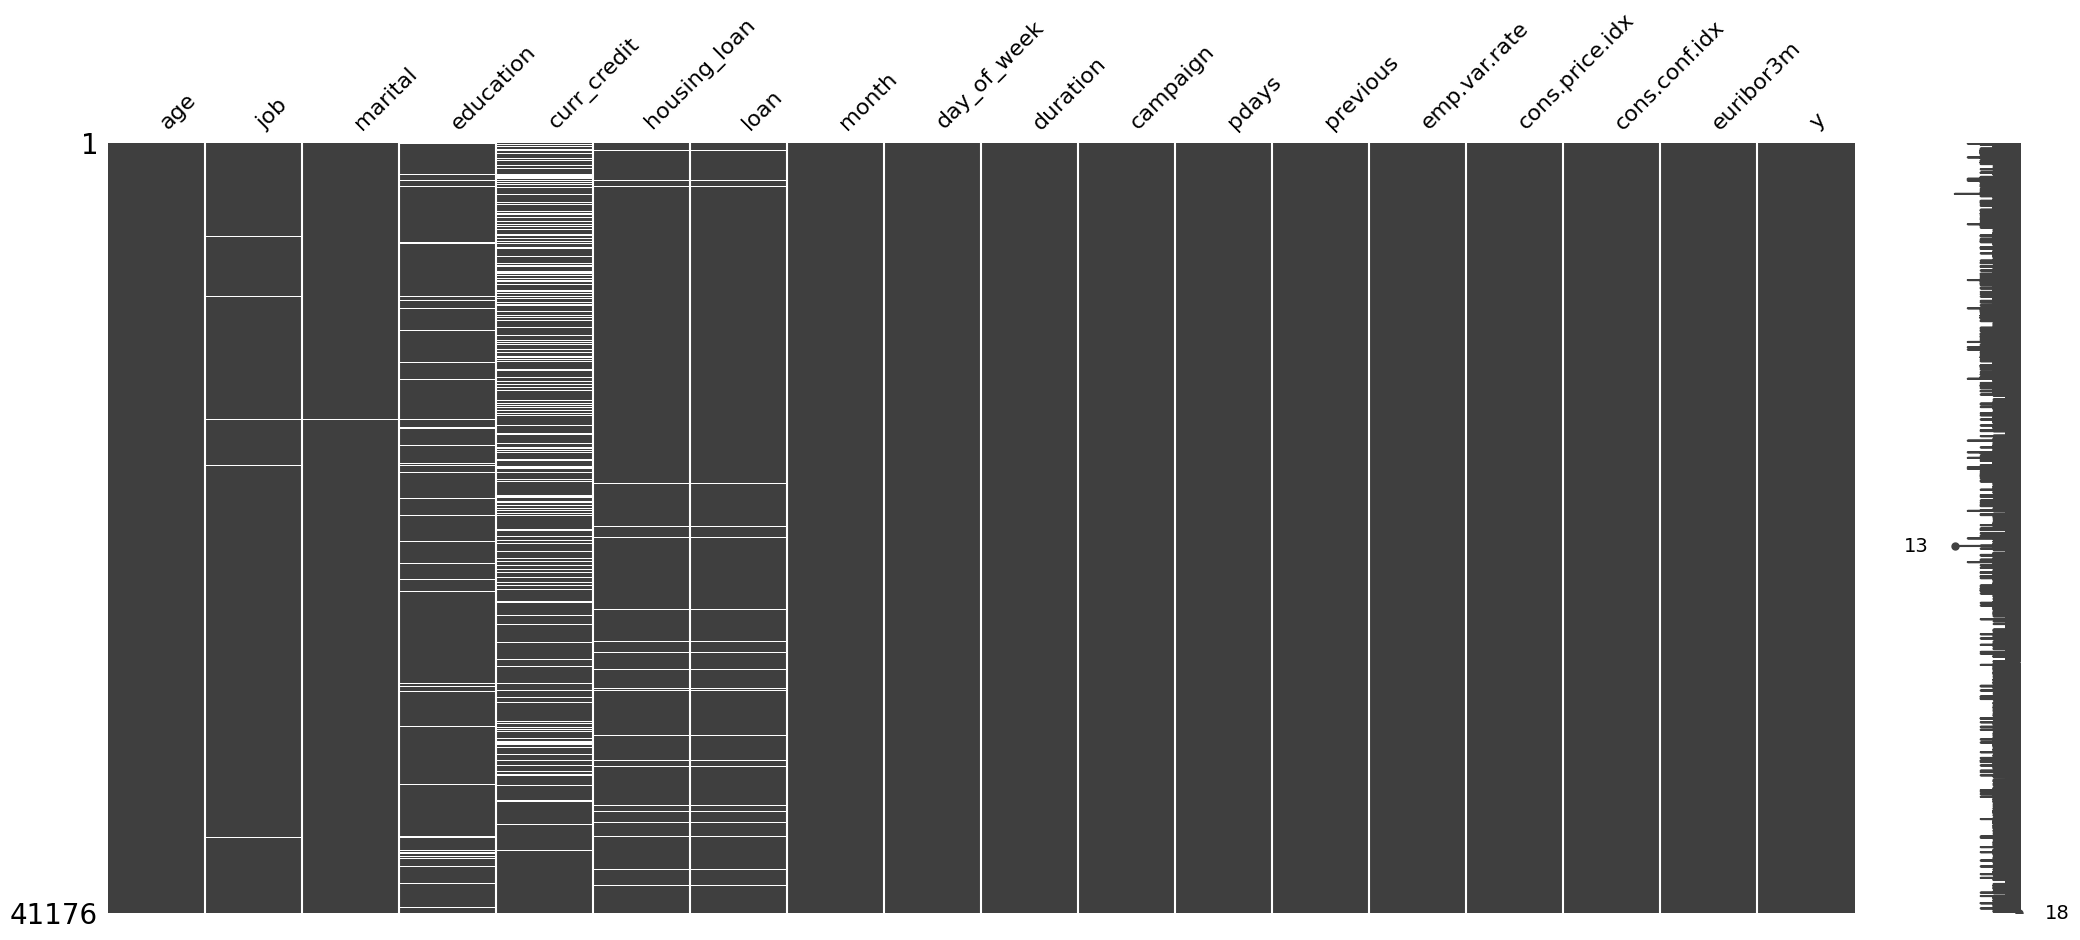

In [12]:
msno.matrix(df)

## split train test

In [13]:
X = df.drop('y',axis=1)
y = df['y']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### convertimos la Y en valor int 


In [15]:
df['y'] = df['y'].map(y = {'yes': 1, 'no': 0})

TypeError: Series.map() got an unexpected keyword argument 'y'

## Codificación de variables categoricas y extracción de caracteristicas

In [ ]:
variables = df.select_dtypes(include=['object', 'category']).columns.tolist()
variables

['job',
 'marital',
 'education',
 'curr_credit',
 'housing_loan',
 'loan',
 'month',
 'day_of_week',
 'y']

In [ ]:
for col in df:
    print(col)
    print(df[col].unique())

age
[56 57 37 40 45 59 41 24 25 29 35 54 46 50 39 30 55 49 34 52 58 32 38 44
 42 60 53 47 51 48 33 31 43 36 28 27 26 22 23 20 21 61 19 18 70 66 76 67
 73 88 95 77 68 75 63 80 62 65 72 82 64 71 69 78 85 79 83 81 74 17 87 91
 86 98 94 84 92 89]
job
['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' nan 'entrepreneur' 'student']
marital
['married' 'single' 'divorced' nan]
education
['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course' nan
 'university.degree' 'illiterate']
curr_credit
['no' nan 'yes']
housing_loan
['no' 'yes' nan]
loan
['no' 'yes' nan]
month
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']
day_of_week
['mon' 'tue' 'wed' 'thu' 'fri']
duration
[ 261  149  226 ... 1246 1556 1868]
campaign
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 19 18 23 14 22 25 16 17 15 20 56
 39 35 42 28 26 27 32 21 24 29 31 30 41 37 40 33 34 43]
pdays
[999   6   4   3   5   1   0  10   7   8   9  11   2  12  13  14 

In [ ]:
# marital, curr_credit, housing_loan, loan. These variables have categories that can be grouped and make with map()
df['marital'] = df['marital'].map({'married': 1, 'single': 0, 'divorced': 3, 'unknown': -1})
df['curr_credit'] = df['curr_credit'].map({'yes': 1, 'no': 0, 'unknown': -1})
df['housing_loan'] = df['housing_loan'].map({'yes': 1, 'no': 0, 'unknown': -1})
df['loan'] = df['loan'].map({'yes': 1, 'no': 0, 'unknown': -1})

In [ ]:
df_1 = df.copy()
cod_variables = ['job', 'education', 'month', 'day_of_week']  
onehot_encoder = OneHotEncoder(handle_unknown='ignore', categories=cod_variables)

onehot_encoder = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), ['job', 'education', 'month', 'day_of_week'])
    ],
    remainder='passthrough'
)


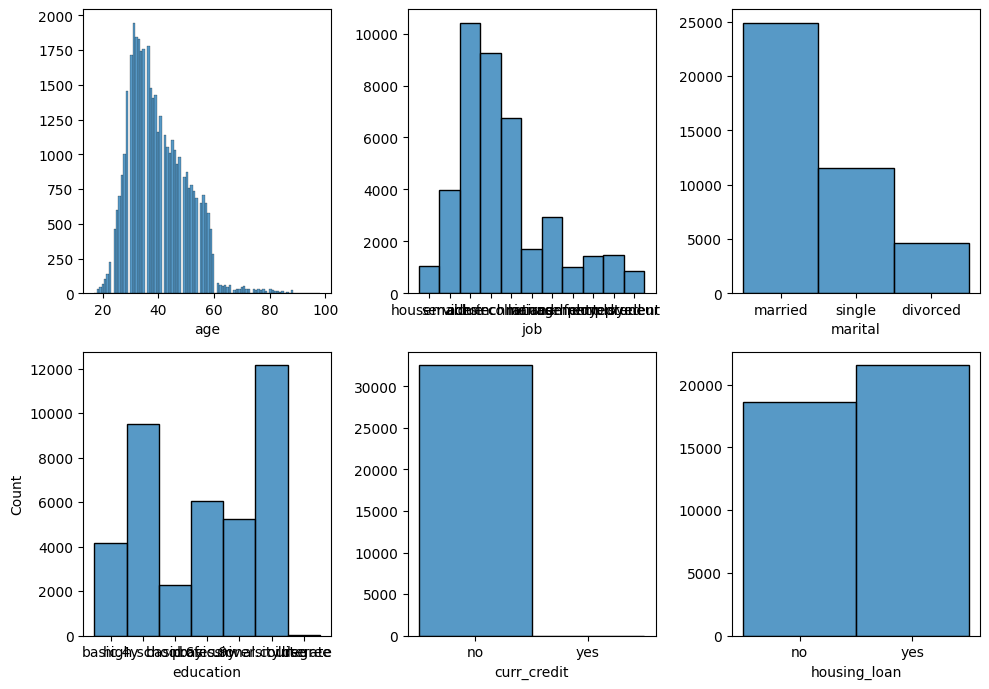

In [ ]:
import matplotlib.pyplot as plt 
import seaborn as sns

fig, axis = plt.subplots(2, 3, figsize = (10, 7))

sns.histplot(ax=axis[0, 0], data=df, x="age").set(ylabel=None)
sns.histplot(ax=axis[0, 1], data=df, x="job").set(ylabel=None)
sns.histplot(ax=axis[0, 2], data=df, x="marital").set(ylabel=None)

sns.histplot(ax=axis[1, 0], data=df, x="education")
sns.histplot(ax=axis[1, 1], data=df, x="curr_credit").set(ylabel=None)
sns.histplot(ax=axis[1, 2], data=df, x="housing_loan").set(ylabel=None)

plt.tight_layout()
plt.show()


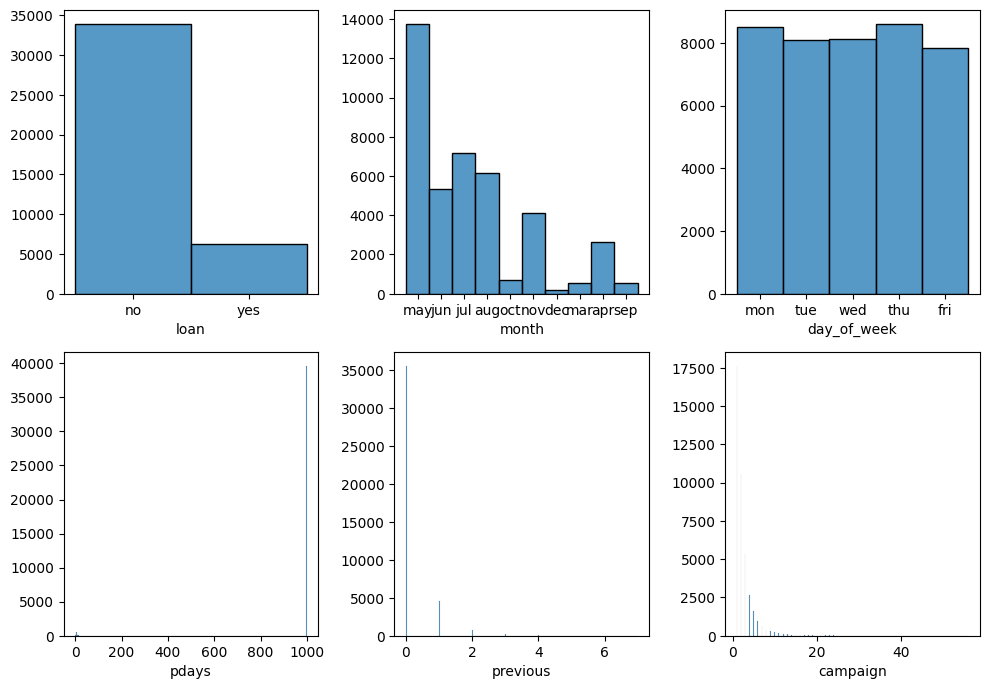

In [ ]:

fig, axis = plt.subplots(2, 3, figsize=(10, 7))

sns.histplot(ax = axis[0, 0], data = df, x = "loan").set(ylabel = None) 
sns.histplot(ax = axis[0, 1], data = df, x = "month").set(ylabel = None)
sns.histplot(ax = axis[0, 2], data = df, x = "day_of_week").set(ylabel = None)

sns.histplot(ax = axis[1, 0], data = df, x = "pdays").set(ylabel = None)
sns.histplot(ax = axis[1, 1], data = df, x = "previous").set(ylabel = None) 
sns.histplot(ax = axis[1, 2], data = df, x = "campaign").set(ylabel = None)

plt.tight_layout()
plt.show()

### imputacion con miss forest 


### Seleccion de caracteristicas 

## matriz de corelacciones de caracteristicas 